In [1]:
#Codsoft intern : Pawan Lahoti
#Machine Learning 
#import all the libraries
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
#Load the CSV file
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',delimiter=',',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.sample(5)

,v1,v2
4363,ham,So what about you. What do you remember
2146,ham,So can collect ur laptop?
4009,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
3414,ham,He remains a bro amongst bros
2946,ham,Leave it. U will always be ignorant.


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

In [12]:
df.sample(5)

,v1,v2
1939,spam,More people are dogging in your area now. Call...
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...
1397,ham,Then we wait 4 u lor... No need 2 feel bad lar...
2911,ham,You didn't have to tell me that...now i'm thin...
754,ham,Realy sorry-i don't recognise this number and ...


In [13]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [14]:
df.sample(5)

,target,text
5541,ham,Yeah it's jus rite...
4259,ham,Are you plans with your family set in stone ?
4202,ham,C movie is juz last minute decision mah. Juz w...
1112,ham,So that means you still think of teju
4397,ham,Can you tell Shola to please go to college of ...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.sample(5)

,target,text
4598,0,Have you laid your airtel line to rest?
5518,0,"By the way, i've put a skip right outside the ..."
4120,0,Yunny... I'm goin to be late
3222,0,Well that must be a pain to catch
2059,0,He didn't see his shadow. We get an early spri...


In [18]:
df['num_characters'] = df['text'].apply(lambda x: len(x))

In [19]:
df.sample(5)

,target,text,num_characters
3503,0,Will you be here for food,25
3737,0,We stopped to get ice cream and will go back a...,50
2153,0,I dont have i shall buy one dear,32
5028,1,I'd like to tell you my deepest darkest fantas...,126
4174,0,How are you doing. How's the queen. Are you go...,71


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [21]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [22]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [27]:
#ham

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
#spam

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

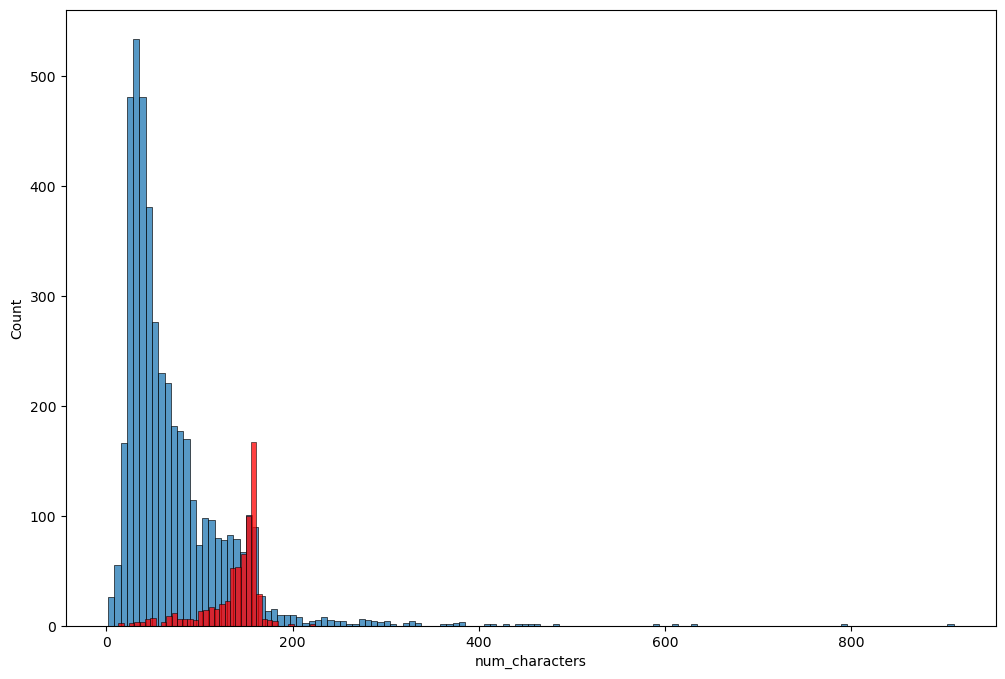

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='r')

<Axes: xlabel='num_words', ylabel='Count'>

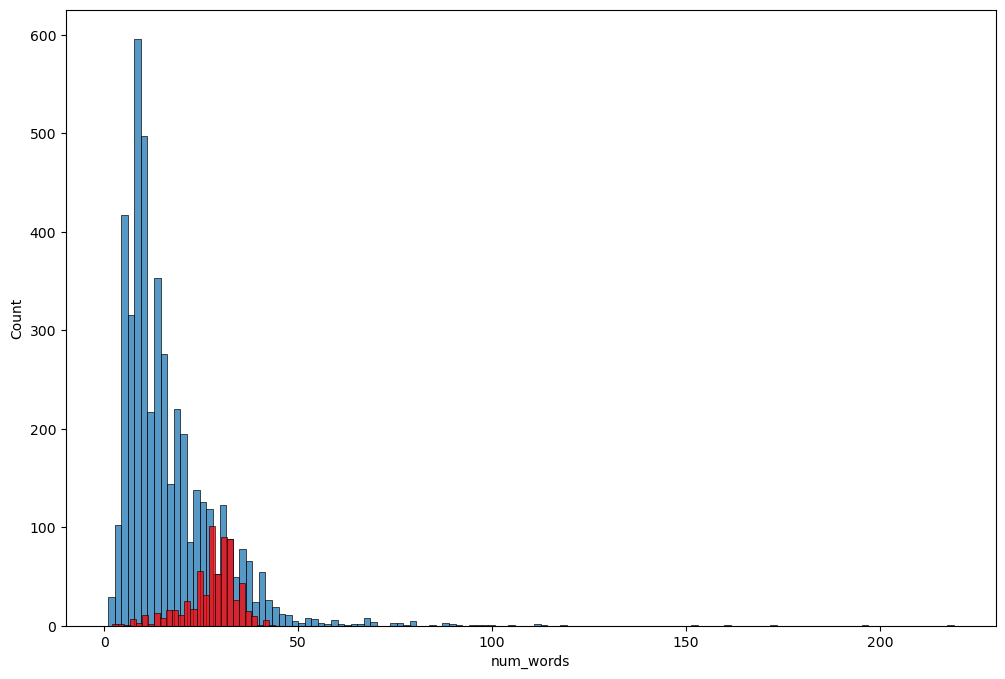

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

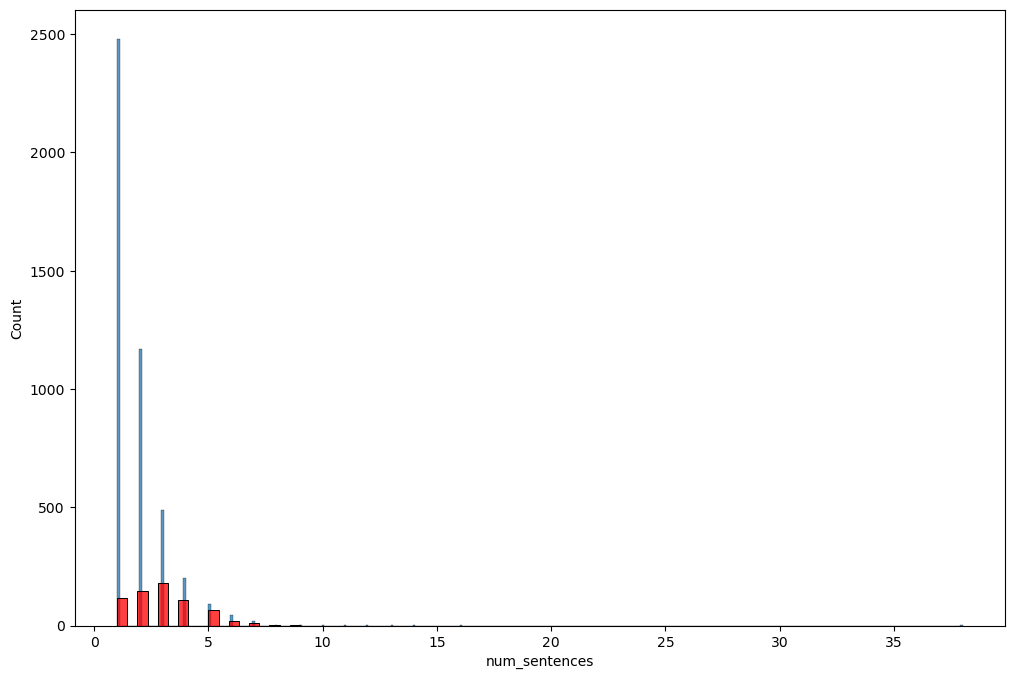

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='r')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


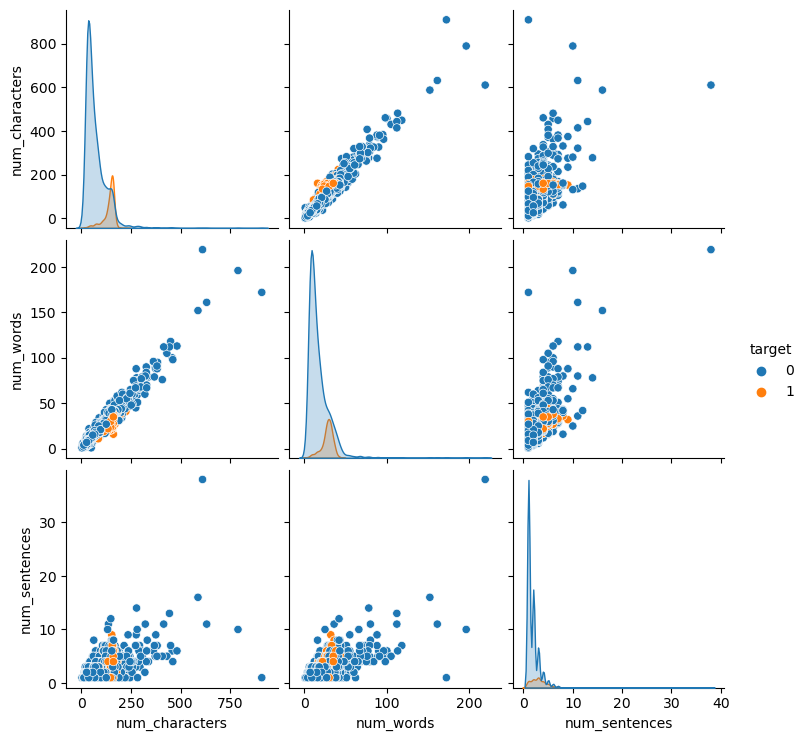

In [33]:
sns.pairplot(df, hue = 'target')

/tmp/ipykernel_20/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

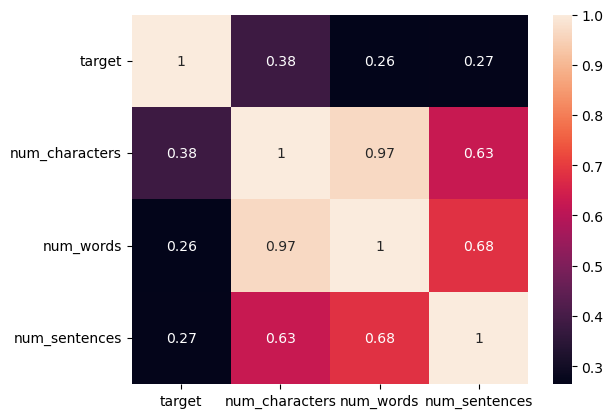

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
import string

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))     
    
    return ' '.join(y)

In [39]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [42]:
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc =WordCloud(width = 500, height = 500, min_font_size=10, background_color = 'white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

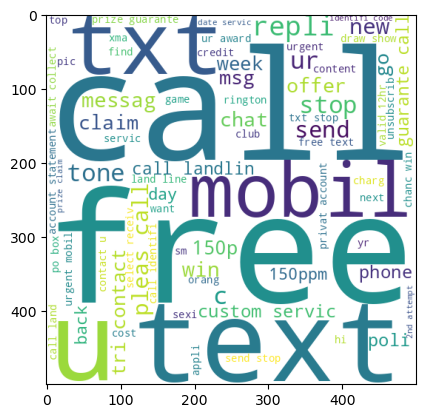

In [47]:
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

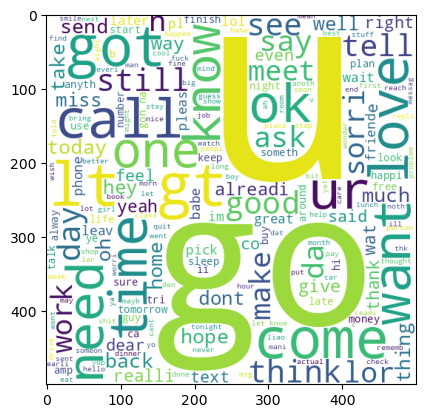

In [49]:
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9883

In [53]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, 'prize'),
  Text(12, 0, '4'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

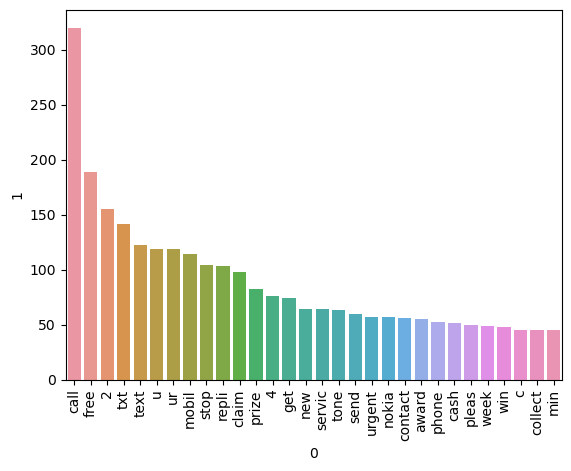

In [54]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [55]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)   

In [56]:
len(ham_corpus)

34771

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'like'),
  Text(9, 0, 'know'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'good'),
  Text(13, 0, 'want'),
  Text(14, 0, 'ok'),
  Text(15, 0, 'love'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, '4'),
  Text(21, 0, 'lor'),
  Text(22, 0, 'think'),
  Text(23, 0, 'home'),
  Text(24, 0, 'see'),
  Text(25, 0, 'still'),
  Text(26, 0, 'take'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

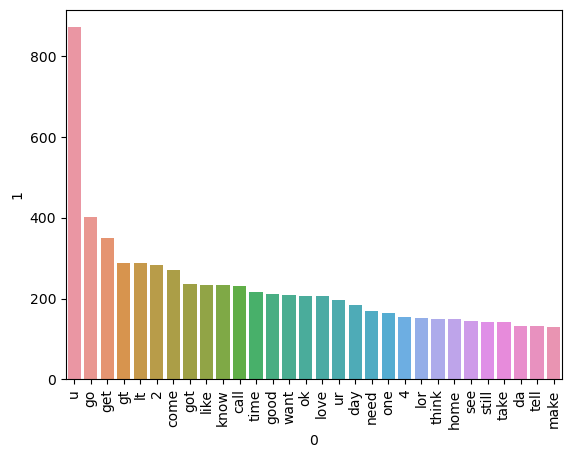

In [57]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [59]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [60]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
X.shape

(5169, 6629)

In [62]:
y = df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [72]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
y = df['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [78]:
gnb.fit(X_train, y_train)
y_predi1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_predi1))
print(confusion_matrix(y_test, y_predi1))
print(precision_score(y_test,y_predi1))

0.8578336557059961
[[774 120]
 [ 27 113]]
0.48497854077253216


In [79]:
mnb.fit(X_train, y_train)
y_predi2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_predi2))
print(confusion_matrix(y_test, y_predi2))
print(precision_score(y_test,y_predi2))

0.9497098646034816
[[894   0]
 [ 52  88]]
1.0


In [80]:
bnb.fit(X_train, y_train)
y_predi3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_predi3))
print(confusion_matrix(y_test, y_predi3))
print(precision_score(y_test,y_predi3))

0.965183752417795
[[890   4]
 [ 32 108]]
0.9642857142857143


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [82]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel='sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
hgc = HistGradientBoostingClassifier(max_depth=5, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgbrf = XGBRFClassifier(n_estimators=50, random_state=2)

In [83]:
clfs = {
    'LRC':lrc,
    'SVC':svc,
    'MNB': mnb,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ADA':ada,
    'GBC':gbc,
    'BC':bc,
    'ETC':etc,
    'HGC':hgc,
    'XGB':xgb,
    'XGBRF':xgbrf
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LRC
Accuracy -  0.941972920696325
Precision -  0.9081632653061225
For  SVC
Accuracy -  0.9680851063829787
Precision -  0.9572649572649573
For  MNB
Accuracy -  0.9497098646034816
Precision -  1.0
For  DTC
Accuracy -  0.9332688588007737
Precision -  0.8817204301075269
For  KNN
Accuracy -  0.8974854932301741
Precision -  1.0
For  RFC
Accuracy -  0.9661508704061895
Precision -  1.0
For  ADA
Accuracy -  0.9545454545454546
Precision -  0.9345794392523364
For  GBC
Accuracy -  0.9458413926499033
Precision -  0.9772727272727273
For  BC
Accuracy -  0.9622823984526112
Precision -  0.9243697478991597
For  ETC
Accuracy -  0.9700193423597679
Precision -  1.0
For  HGC
Accuracy -  0.9700193423597679
Precision -  0.990990990990991
For  XGB
Accuracy -  0.9700193423597679
Precision -  0.9823008849557522
For  XGBRF
Accuracy -  0.941972920696325
Precision -  0.8921568627450981


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 
                               'Precision':precision_scores}).sort_values(['Precision','Accuracy'], ascending=False)
performance_df

,Algorithm,Accuracy,Precision
9,ETC,0.970019,1.000000
5,RFC,0.966151,1.000000
2,MNB,0.949710,1.000000
4,KNN,0.897485,1.000000
10,HGC,0.970019,0.990991
11,XGB,0.970019,0.982301
7,GBC,0.945841,0.977273
1,SVC,0.968085,0.957265
6,ADA,0.954545,0.934579
8,BC,0.962282,0.924370


In [87]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.970019
1,RFC,Accuracy,0.966151
2,MNB,Accuracy,0.949710
3,KNN,Accuracy,0.897485
4,HGC,Accuracy,0.970019
5,XGB,Accuracy,0.970019
6,GBC,Accuracy,0.945841
7,SVC,Accuracy,0.968085
8,ADA,Accuracy,0.954545
9,BC,Accuracy,0.962282


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


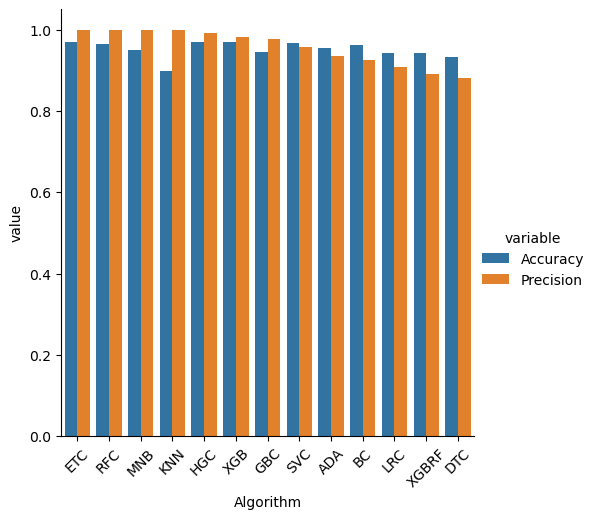

In [88]:
sns.catplot(x = 'Algorithm', y = 'value', hue='variable', data = performance_df1, kind='bar',height=5)
plt.xticks(rotation= 45)
plt.show()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [91]:
sc = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))
print('Precision', precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9606299212598425


In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9914529914529915
